In [1]:
import pandas as pd
import numpy as np

In [2]:
import sys
sys.path.insert(0, "/home1/smaruj/akitaX1-analyses/utils/")
from reading_averaging_utils import read_and_average_virtual_exp
from analysis_utils import (collect_flanked_sequences, reorder_by_hamming_dist, prepare_nt_count_table)

2024-02-13 15:59:01.246541: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-13 15:59:01.283745: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-13 15:59:01.283807: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-13 15:59:01.285285: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-13 15:59:01.294191: I tensorflow/core/platform/cpu_feature_guar

In [3]:
# seq_matrix_plotting
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors

# logo
import logomaker as lm
from sklearn.preprocessing import normalize

In [4]:
# stat metric the analysis is based on
stat_of_analysis_interest = "SCD"

In [5]:
# reading data, averaging over targets and backgrounds
df = read_and_average_virtual_exp("/project/fudenber_735/akitaX1_analyses_data/virtual_insertion_singletons", stat_to_average=stat_of_analysis_interest)

reading h5 files to dataframes
averaging over targets
averaging over backgrounds
collecting data for SCD


In [6]:
# num of sites the further analysis is based on
num_sites = 150
sites = df.sort_values(by=[stat_of_analysis_interest], ascending=False)[:num_sites].reset_index()

## Plotting Functions

In [7]:
def plot_seq_matrix(dna_matrix, cluster_by_hamming=True):
    
    # colormap matching logo colors
    cmap_acgt = colors.ListedColormap([
        'green', #a green
        'blue', #c blue
        'gold', #g gold
        'red' #t red
    ])

    if cluster_by_hamming:
        dna_matrix = reorder_by_hamming_dist(dna_matrix)

    plt.figure(figsize=(10,18))
    im = plt.matshow(
        dna_matrix, 
        cmap=cmap_acgt,
        fignum=False) 
    plt.colorbar(im, fraction=0.046, pad=0.04)


def plot_logo_from_counts(nt_count_table, logo_height = 3, logo_width = 0.45):
    
    dna_prob = normalize(nt_count_table, axis=1, norm="l1")
    dna_prob_df = pd.DataFrame(dna_prob, columns=["A", "C", "G", "T"])

    logo_params = {"df": lm.transform_matrix(dna_prob_df, from_type="probability", to_type="information"),
                "figsize": (logo_width * dna_prob_df.shape[0], logo_height),
                "show_spines": False,
                "vpad": 0.02}
    
    logo = lm.Logo(**logo_params)
    logo.ax.set_ylabel("Bits", fontsize=16)
    logo.ax.set_ylim(0, 2)
    logo.ax.set_yticks([0, 0.5, 1, 1.5, 2], minor=False)
    

## Visualizing Sequences as Matrix

In [8]:
dna_matrix = collect_flanked_sequences(sites)

/home1/smaruj/akitaX1-analyses/utils/analysis_utils.py:87: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  scipy.cluster.hierarchy.linkage(seq_dist)


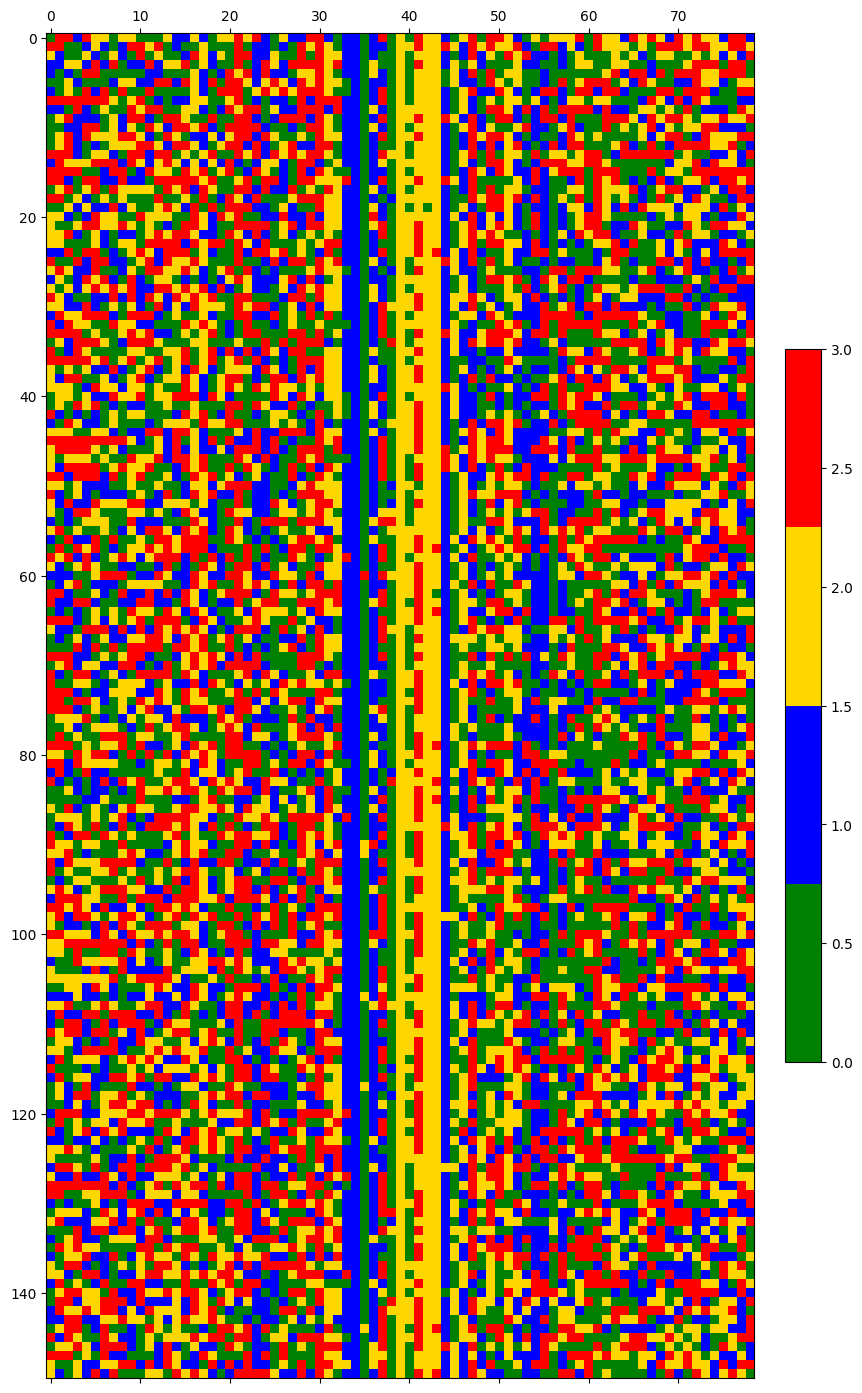

In [9]:
plot_seq_matrix(dna_matrix)

## Creating Logo

In [10]:
nt_count_table = prepare_nt_count_table(sites)

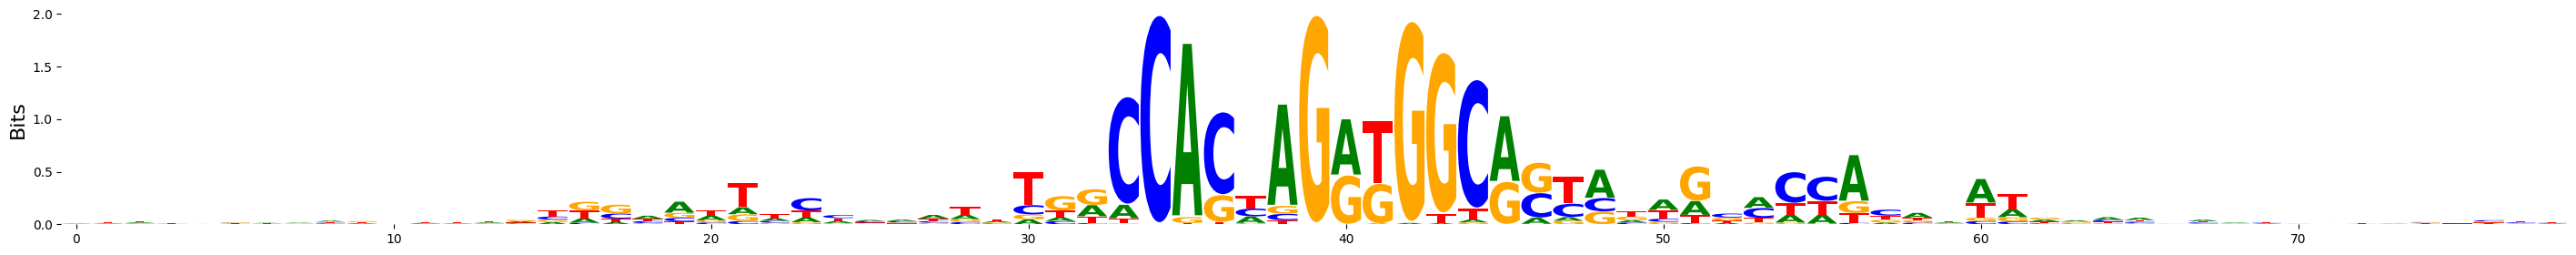

In [11]:
plot_logo_from_counts(nt_count_table)